In [1]:
!pip install imblearn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing,

# graphing/plotting
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns               

# machine learning 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import xgboost
from xgboost import XGBClassifier
import imblearn
from imblearn.over_sampling import SMOTENC 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# get the package versions
print('Numpy version is:{}'.format(np.__version__))
print('Pandas version is:{}'.format(pd.__version__))
print('matplotlib version is:{}'.format(matplotlib.__version__))
print('seaborn version is:{}'.format(sns.__version__))
print('sci-kit learn version is:{}'.format(sklearn.__version__))
print('xgboost version is:{}'.format(xgboost.__version__))
print('imbalanced-learn version is:{}'.format(imblearn.__version__))

Numpy version is:1.26.4
Pandas version is:2.2.3
matplotlib version is:3.7.2
seaborn version is:0.12.2
sci-kit learn version is:1.6.1
xgboost version is:2.0.3
imbalanced-learn version is:0.13.0


In [4]:
# look at training
train_df= pd.read_csv('/kaggle/input/titanic/train.csv')


print('training dataframe')
print(train_df.head(10))


training dataframe
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Ti

In [5]:
# look at test
test_df= pd.read_csv('/kaggle/input/titanic/test.csv')


print('test dataframe')
print(test_df.head(10))

test dataframe
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   N

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


<Axes: title={'center': 'Training Data'}, xlabel='Survived', ylabel='count'>

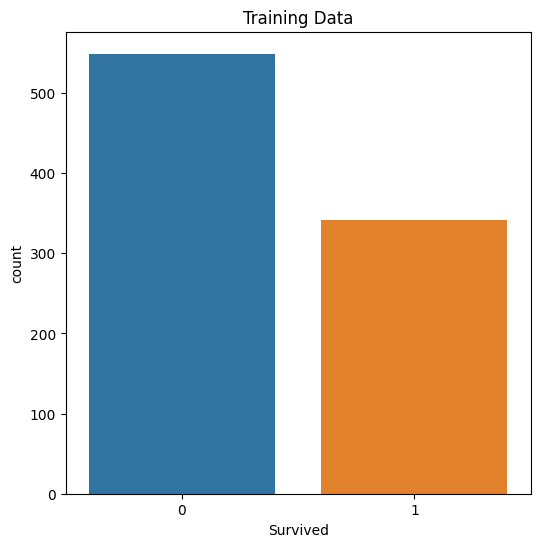

In [6]:
# check to see if training data is balanced
print(train_df['Survived'].value_counts(normalize= True))

fig1= plt.figure(figsize= (6, 6))
ax1= plt.gca()
ax1.set_ylabel('Survived')
ax1.set_xlabel('Counts')
ax1.set_title('Training Data')
sns.countplot(x= train_df['Survived'])


Training dataset is imbalanced.

In [7]:
# look at the column information for training data
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# look at the column information for test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
# count the null value for training
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Only 3 columns have null values: cabin, age and embarked.  Cabin has a lot of null values.  embarked has very few null values.

In [10]:
# count the null value for test
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# drop the rows with missing embark
train_df= train_df.dropna(subset= ['Embarked'])

In [12]:
# cabin has high number of null so it will be dropped
train_df= train_df.drop(columns= ['Cabin'])
print('training dataframe')
print(train_df.head())

# test
test_df= test_df.drop(columns= ['Cabin'])
print('test dataframe')
print(test_df.head())

training dataframe
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
test dataframe
   P

In [13]:
# split the training into train and validation

train_feat= train_df.drop(columns= ['Survived'])
train_target= train_df['Survived']

x_train, x_val, y_train, y_val= train_test_split(train_feat, train_target, test_size= 0.2, random_state= 24, stratify= train_target)

print('shape of x_train is:{}'.format(x_train.shape))
print('shape of x_val is:{}'.format(x_val.shape))
print('shape of y_train is:{}'.format(y_train.shape))
print('shape of y_val is:{}'.format(y_val.shape))

shape of x_train is:(711, 10)
shape of x_val is:(178, 10)
shape of y_train is:(711,)
shape of y_val is:(178,)


In [14]:
# impute the null/missing values in age with median
# training
x_train['Age']= x_train['Age'].fillna(x_train['Age'].median())
print('Training Columns')
print(x_train.isnull().sum())

# validation
x_val['Age']= x_val['Age'].fillna(x_val['Age'].median())
print('-'*80)
print('Validation Columns')
print(x_val.isnull().sum())

# test
test_df['Age']= test_df['Age'].fillna(test_df['Age'].median())



# test fare impute with median
test_df['Fare']= test_df['Fare'].fillna(test_df['Fare'].median())
print('-'*80)
print('Test Columns')
test_df.isnull().sum()

Training Columns
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------------------------------------------------------------------
Validation Columns
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------------------------------------------------------------------
Test Columns


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# look at how many unique values are in passengerid and name


print( 'number of unique values for passengerid', train_df['PassengerId'].nunique())
print('-'*80)

print( 'number of unique values for name', train_df['Name'].nunique())
print('-'*80)

print( 'number of unique values for ticket', train_df['Ticket'].nunique())
print('-'*80)



number of unique values for passengerid 889
--------------------------------------------------------------------------------
number of unique values for name 889
--------------------------------------------------------------------------------
number of unique values for ticket 680
--------------------------------------------------------------------------------


Name and PassengerId are unique values for each row so they will be dropped.

In [16]:
# drop passengerid and name from train, val and test
x_train= x_train.reset_index(drop= True)
x_val= x_val.reset_index(drop= True)
test_df= test_df.reset_index(drop= True)


id_train= x_train['PassengerId']
id_val= x_val['PassengerId']
id_test= test_df['PassengerId']

x_train= x_train.drop(columns= ['PassengerId', 'Name'])
x_val= x_val.drop(columns= ['PassengerId', 'Name'])
x_test= test_df.drop(columns= ['PassengerId', 'Name'])

print('Training')
print(x_train.head())
print('-'*80)
print('Validation')
print(x_val.head())
print('-'*80)
print('Test')
print(x_test.head())

Training
   Pclass     Sex    Age  SibSp  Parch           Ticket      Fare Embarked
0       1    male   0.92      1      2           113781  151.5500        S
1       3    male  29.00      0      0  SOTON/OQ 392086    8.0500        S
2       1  female  47.00      1      1            11751   52.5542        S
3       3    male  22.00      0      0             2620    7.2250        C
4       1  female  18.00      2      2         PC 17608  262.3750        C
--------------------------------------------------------------------------------
Validation
   Pclass     Sex   Age  SibSp  Parch      Ticket    Fare Embarked
0       3    male  33.0      0      0      347062   7.775        S
1       3  female  29.0      0      4      349909  21.075        S
2       1    male  52.0      1      1      110413  79.650        S
3       2  female  17.0      0      0  SO/C 14885  10.500        S
4       2    male   2.0      1      1      230080  26.000        S
-----------------------------------------------

In [17]:
# get the numeric columns and categorical columns
num_cols= list(x_train.select_dtypes(include= 'number').columns)
print('Numeric columns are ', num_cols)


str_cols= list(x_train.select_dtypes(exclude= 'number').columns)
print('categorical columns are ', str_cols)

Numeric columns are  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns are  ['Sex', 'Ticket', 'Embarked']


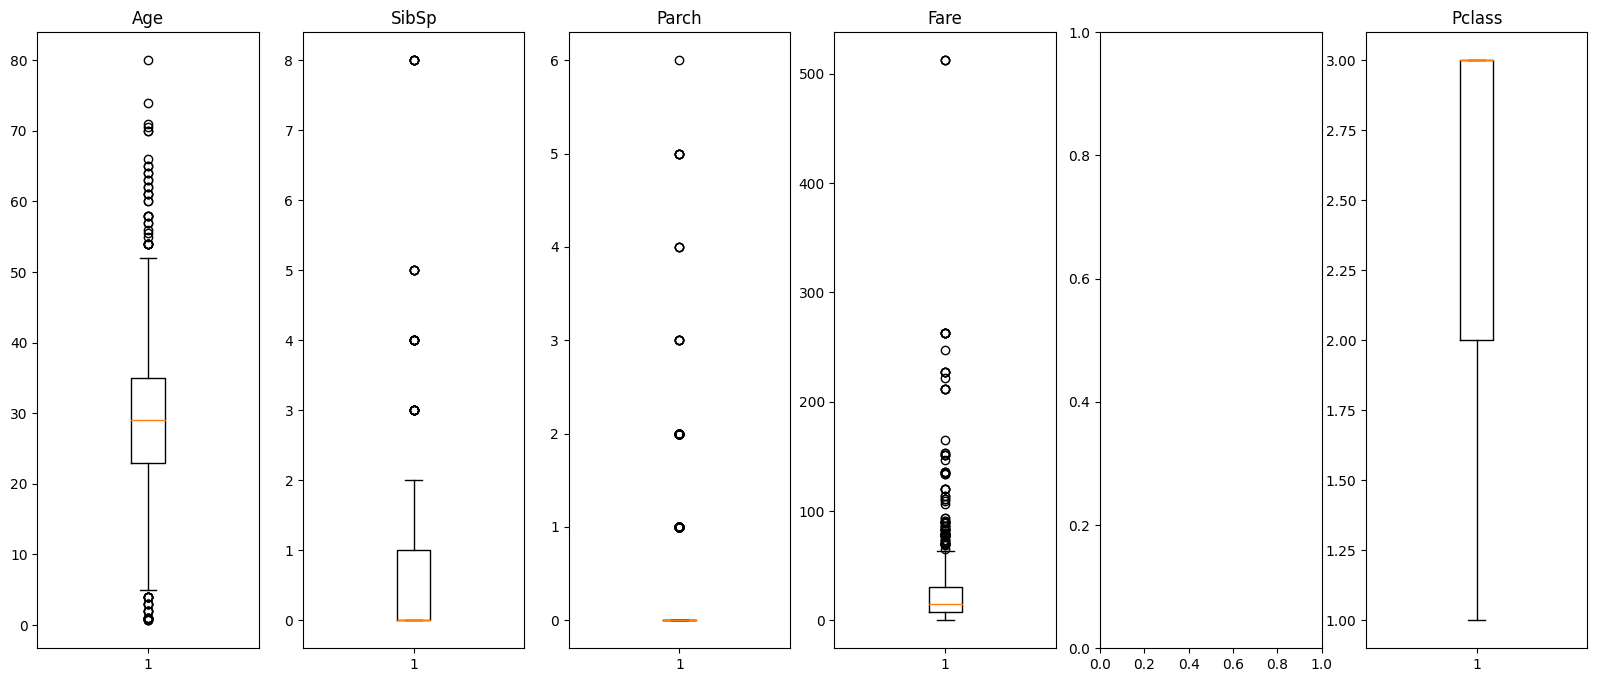

In [18]:
# look at numeric columns for training data
fig2, ax2= plt.subplots(1, 6, figsize= (20, 8))
for i, j in enumerate(num_cols):
    ax2[i-1].boxplot(x_train[j])
    ax2[i-1].set_title(j)
    


PClass, SibSp and Fare are skewed.  Age and Fare have a lot of outliers.

In [19]:
# try out new imbalanced data method for training

# reset index
x_train= x_train.reset_index(drop= True)
y_train= y_train.reset_index(drop= True)

#smote= SMOTENC(categorical_features= str_cols, sampling_strategy= 'minority')
#x_train_smote, y_train= smote.fit_resample(x_train, y_train)



# OVERSAMPLE train1, minoity class, need replace= True
#recombine x and y for train
train_df= pd.concat([x_train, y_train], axis= 1)
train0= train_df[train_df['Survived']== 0]
train1= train_df[train_df['Survived']== 1]
train1_up= train1.sample(train0.shape[0], replace= True, random_state= 24)
new_train_df= pd.concat([train1_up, train0], axis= 0)
y_train= new_train_df['Survived']
x_train= new_train_df.drop('Survived', axis= 1)

print('shape of x_train is:{}'.format(x_train.shape))
print(y_train.value_counts())

# if no imbalance method then assign class weight
y0_counts, y1_counts= y_train.value_counts()
weight0= np.round(y1_counts/y0_counts, 3)
weight1= np.round(1/weight0, 3)
classweight= {0:weight0, 1:weight1}

print('weight0 is:{}'.format(weight0))
print('weight1 is:{}'.format(weight1))

shape of x_train is:(878, 8)
Survived
1    439
0    439
Name: count, dtype: int64
weight0 is:1.0
weight1 is:1.0


In [20]:
# reset all index

x_train= x_train.reset_index(drop= True)
x_val= x_val.reset_index(drop= True)
x_test= x_test.reset_index(drop= True)

In [21]:
# one hot encode the categorical variables

# make the one hot encoder
encoder= OneHotEncoder(handle_unknown= 'ignore', sparse_output= False)


# fit and transform the training data
x_train_encoded= encoder.fit_transform(x_train[str_cols])
x_train_encoded= pd.DataFrame(x_train_encoded, columns= encoder.get_feature_names_out())
x_train_encoded= pd.concat([x_train[num_cols], x_train_encoded], axis= 1)

print('Training encoded')
print(x_train_encoded.head())


# transform the validation data
x_val_encoded= encoder.transform(x_val[str_cols])
x_val_encoded= pd.DataFrame(x_val_encoded, columns= encoder.get_feature_names_out())
x_val_encoded= pd.concat([x_val[num_cols], x_val_encoded], axis= 1)

print('-'*80)
print('Validation encoded')
print(x_val_encoded.head())


# transform the test data
x_test_encoded= encoder.transform(x_test[str_cols])
x_test_encoded= pd.DataFrame(x_test_encoded, columns= encoder.get_feature_names_out())
x_test_encoded= pd.concat([x_test[num_cols], x_test_encoded], axis= 1)

print('-'*80)
print('Test encoded')
print(x_test_encoded.head())


Training encoded
   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Ticket_110152  \
0       1  29.0      0      0  79.2000         1.0       0.0            0.0   
1       1  52.0      1      0  78.2667         1.0       0.0            0.0   
2       1  49.0      1      0  56.9292         0.0       1.0            0.0   
3       2  25.0      0      1  26.0000         1.0       0.0            0.0   
4       1  24.0      0      0  69.3000         1.0       0.0            0.0   

   Ticket_110413  Ticket_110465  ...  Ticket_W./C. 14263  Ticket_W./C. 6607  \
0            0.0            0.0  ...                 0.0                0.0   
1            0.0            0.0  ...                 0.0                0.0   
2            0.0            0.0  ...                 0.0                0.0   
3            0.0            0.0  ...                 0.0                0.0   
4            0.0            0.0  ...                 0.0                0.0   

   Ticket_W./C. 6608  Ticket_W./C

In [22]:
# find string columns for encoded dataframe
str_cols_encoded= list(set(x_train_encoded.columns) - set(num_cols))
#print(str_cols_encoded)

In [23]:
# scale the data 

# make the scaler
scaler= MinMaxScaler()

# apply scaler to training
x_train_num= scaler.fit_transform(x_train_encoded[num_cols])
x_train_num= pd.DataFrame(x_train_num, columns= num_cols)
x_train_scaled= pd.concat([x_train_num, x_train_encoded[str_cols_encoded]], axis= 1)

print('Training')
print(x_train_scaled.head())

# transform validation using scaler
x_val_num= scaler.transform(x_val_encoded[num_cols])
x_val_num= pd.DataFrame(x_val_num, columns= num_cols)
x_val_scaled= pd.concat([x_val_num, x_val_encoded[str_cols_encoded]], axis= 1)

print('-'*80)
print('Validation')
print(x_val_scaled.head())

# transform test using scaler
x_test_num= scaler.fit_transform(x_test_encoded[num_cols])
x_test_num= pd.DataFrame(x_test_num, columns= num_cols)
x_test_scaled= pd.concat([x_test_num, x_test_encoded[str_cols_encoded]], axis= 1)

print('-'*80)
print('Test')
print(x_test_scaled.head())

Training
   Pclass       Age  SibSp     Parch      Fare  Ticket_19947  \
0     0.0  0.386336  0.000  0.000000  0.154588           0.0   
1     0.0  0.699986  0.125  0.000000  0.152766           0.0   
2     0.0  0.659075  0.125  0.000000  0.111118           0.0   
3     0.5  0.331788  0.000  0.166667  0.050749           0.0   
4     0.0  0.318151  0.000  0.000000  0.135265           0.0   

   Ticket_W./C. 6607  Ticket_349233  Ticket_220845  Ticket_250647  ...  \
0                0.0            0.0            0.0            0.0  ...   
1                0.0            0.0            0.0            0.0  ...   
2                0.0            0.0            0.0            0.0  ...   
3                0.0            0.0            0.0            0.0  ...   
4                0.0            0.0            0.0            0.0  ...   

   Ticket_3101267  Ticket_374887  Ticket_2699  Ticket_SOTON/O.Q. 3101311  \
0             0.0            0.0          0.0                        0.0   
1        

In [24]:
# make function to compare ML models
def metric_fn(model, name):
    #training
    model.fit(x_train_scaled, y_train)
    # predict
    y_pred_train= model.predict(x_train_scaled)
    y_pred_val= model.predict(x_val_scaled)
    # evaluate
    metric_list= [name, np.round(accuracy_score(y_train, y_pred_train), 3), np.round(f1_score(y_train, y_pred_train), 3), 
                 np.round(accuracy_score(y_val, y_pred_val), 3), np.round(f1_score(y_val, y_pred_val), 3)]
    # evaluate dataframe
    metric_df= pd.DataFrame(data= [metric_list], columns= ['Model', 'Acc_train', 'F1_train', 'Acc_val', 'F1_val'])
    return metric_df, y_pred_val 

In [25]:
# logistic regression
model_log= LogisticRegression(random_state= 24)
#model_log= LogisticRegression(random_state= 24, class_weight= classweight)


metric_df, y_pred_val= metric_fn(model_log, 'Logistic_regression')
print(metric_df.head())
print(classification_report(y_val, y_pred_val))


                 Model  Acc_train  F1_train  Acc_val  F1_val
0  Logistic_regression      0.883     0.883    0.798   0.714
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.66      0.71        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



In [26]:
# decision tree
model_dtree= DecisionTreeClassifier(random_state= 24)
#model_dtree= DecisionTreeClassifier(class_weight= classweight, random_state= 24)

metric_df1, y_pred_val1= metric_fn(model_dtree, 'Decision Tree')
metric_df= pd.concat([metric_df, metric_df1], axis= 0)
print(metric_df.head())

# compare decision tree to other ml models
print('-'*80)
print(classification_report(y_val, y_pred_val1))

                 Model  Acc_train  F1_train  Acc_val  F1_val
0  Logistic_regression      0.883     0.883    0.798   0.714
0        Decision Tree      1.000     1.000    0.826   0.744
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.66      0.74        68

    accuracy                           0.83       178
   macro avg       0.83      0.79      0.81       178
weighted avg       0.83      0.83      0.82       178



In [27]:
# random forest
model_forest= RandomForestClassifier(random_state= 24)
#model_forest= RandomForestClassifier(class_weight= classweight, random_state= 24)

metric_df2, y_pred_val2= metric_fn(model_forest, 'Random Forest')
metric_df= pd.concat([metric_df, metric_df2], axis= 0)
print(metric_df.head())

# compare random forest to other ml models
print('-'*80)
print(classification_report(y_val, y_pred_val2))

                 Model  Acc_train  F1_train  Acc_val  F1_val
0  Logistic_regression      0.883     0.883    0.798   0.714
0        Decision Tree      1.000     1.000    0.826   0.744
0        Random Forest      1.000     1.000    0.837   0.756
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.88      0.66      0.76        68

    accuracy                           0.84       178
   macro avg       0.85      0.80      0.82       178
weighted avg       0.84      0.84      0.83       178



In [28]:
# optimized random forest
# list of n_estimators
est_list= [100, 250, 400, 500, 700, 900]
# list of tree depth
depth_list= [5, 10, 15, 20, 25]
acc0= 0

# lop through n_estimators and max depth to find highest validation accuracy
for i in est_list:
    for j in depth_list:
        model1= RandomForestClassifier(n_estimators= i, max_depth= j, random_state= 24)
        metric1, y_pred_val_1a= metric_fn(model1, 'test1')
        acc1= accuracy_score(y_val, y_pred_val_1a)
        if acc1 > acc0:
            est1= i
            depth1= j
            acc0= acc1
            print('Best random forest model is n_estimators:{} and max_depth:{}'.format(est1, depth1))

# random forest model with optimized n_estimators and max depth
forest_opt= RandomForestClassifier(n_estimators= est1, max_depth= depth1, random_state= 24)

metric_df3, y_pred_val3= metric_fn(forest_opt, 'Optimized Random Forest')
metric_df= pd.concat([metric_df, metric_df3], axis= 0)
print(metric_df.head())

# compare optimized random forest to other ml models
print('-'*80)
print(classification_report(y_val, y_pred_val3))

Best random forest model is n_estimators:100 and max_depth:5
Best random forest model is n_estimators:100 and max_depth:10
Best random forest model is n_estimators:100 and max_depth:15
Best random forest model is n_estimators:100 and max_depth:20
Best random forest model is n_estimators:100 and max_depth:25
Best random forest model is n_estimators:250 and max_depth:25
                     Model  Acc_train  F1_train  Acc_val  F1_val
0      Logistic_regression      0.883     0.883    0.798   0.714
0            Decision Tree      1.000     1.000    0.826   0.744
0            Random Forest      1.000     1.000    0.837   0.756
0  Optimized Random Forest      0.973     0.972    0.831   0.754
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.75        68

    accuracy                           0.83       178
   ma

In [29]:
# xgboost
model_boost= XGBClassifier(random_state= 24)
#model_boost= XGBClassifier(scale_pos_weight= weight0/weight1, random_state= 24)


metric_df4, y_pred_val4= metric_fn(model_boost, 'XGBoost')
metric_df= pd.concat([metric_df, metric_df4], axis= 0)
# compare xgboost model to other ml models
print(metric_df.head())
print('-'*80)
print(classification_report(y_val, y_pred_val4))

                     Model  Acc_train  F1_train  Acc_val  F1_val
0      Logistic_regression      0.883     0.883    0.798   0.714
0            Decision Tree      1.000     1.000    0.826   0.744
0            Random Forest      1.000     1.000    0.837   0.756
0  Optimized Random Forest      0.973     0.972    0.831   0.754
0                  XGBoost      0.984     0.984    0.815   0.744
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [30]:
# hyperparamater tuning for xgboost

# list of learning_rates
learn_list= [0.01, 0.025, 0.05, 0.1, 0.2, 0.3]
# list of n_estimators
est_list= [100, 250, 500, 750, 1000]
acc0= 0

# loop through learning rate and estimators to find highest accuracy score
for i in learn_list:
    for j in est_list:
        model1= XGBClassifier(learning_rate= i, n_estimators= j, random_state= 24)
        metric1, y_pred_val_1a= metric_fn(model1, 'test1')
        acc1= accuracy_score(y_val, y_pred_val_1a)
        if acc1 > acc0:
            acc0= acc1
            learn1= i
            est1= j
            print('best model is xgboost with learning_rate: {} and n_estimators: {}'.format(learn1, est1))

# make model with optimized learning rate and n_estimators
boost_opt= XGBClassifier(learning_rate= learn1, n_estimators= est1, random_state= 24)

metric_df5, y_pred_val5= metric_fn(boost_opt, 'Optimized XGBoost')
metric_df= pd.concat([metric_df, metric_df5], axis= 0)

# compare optimized xgboost to other models
print(metric_df)
print('-'*80)
print(classification_report(y_val, y_pred_val5))

best model is xgboost with learning_rate: 0.01 and n_estimators: 100
best model is xgboost with learning_rate: 0.01 and n_estimators: 250
best model is xgboost with learning_rate: 0.01 and n_estimators: 500
best model is xgboost with learning_rate: 0.01 and n_estimators: 750
best model is xgboost with learning_rate: 0.025 and n_estimators: 250
                     Model  Acc_train  F1_train  Acc_val  F1_val
0      Logistic_regression      0.883     0.883    0.798   0.714
0            Decision Tree      1.000     1.000    0.826   0.744
0            Random Forest      1.000     1.000    0.837   0.756
0  Optimized Random Forest      0.973     0.972    0.831   0.754
0                  XGBoost      0.984     0.984    0.815   0.744
0        Optimized XGBoost      0.944     0.944    0.848   0.780
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
         

In [31]:
# predict test using best model: optimized xgboost (highest validation accuracy)

y_test= boost_opt.predict(x_test_scaled)

y_test_df= pd.Series(y_test, name= 'Survived')

y_final= pd.concat([id_test, y_test_df], axis= 1)


y_final.to_csv('/kaggle/working/submission.csv', index= False)